# Wstęp
## Cel ćwiczenia
W tym notebooku głównym celem jest żeby poprawnie przeprowadzić "standardowe" ML flow i przypomnieć sobie/ popracować z biblotekami sklearn, numpy, pandas.
Zadanie będzie wymagało zrobienia Exploratory Data Analysis, a następnie na jej podstawie wykonania preprocessingu danych oraz puszczenie modelu.

### Ogólne informacje do zadania:
#### 1. Zbiór danych
czyli to na czym będziemy pracowac w tym zadaniu. Jest to zbiór [Bank Marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing), na którym do wykonania jest zadanie z klasyfikacji tak jak opisane w repozytorium. Polecam skorzystać z `ucimlrepo` aby go zainstalować.



#### 2. EDA

czyli poznaj swoje dane, a przede wszystkim oceń ich jakość. Potraktuj ten etap jako upewnienie się, że to, co wejdzie do Twojego modelu, jest „czyste” i nie zawiera żadnych niespodziewanych wartości w poszczególnych kolumnach  takich, które w najlepszym przypadku zwróciłyby błąd, a w najgorszym doprowadziły do wytrenowania słabego modelu.
Pamiętaj: *Garbage in, garbage out.* Z pustego nawet Salomon nie naleje, nieważne jak bardzo będziemy dobierać hiperparametry.
Poniżej kilka pomocniczych pytań, które mogą naprowadzić, co należy sprawdzić i na co uważać na etapie EDA:

* czy dane załadowały się prawidłowo
* czy typy kolumn odpowiadają ich zawartości; czy potrzebujemy zmienić typ (np. wiek powinien być w `int`, a nie w typie „object”)
* czy mamy brakujące wartości w jakichś kolumnach- jeśli tak, to co z nimi robimy (usuwamy wiersze? kolumny? uzupełniamy brak?); jeśli uzupełniamy, to w jaki sposób, by było to optymalne. Istnieje kilka prostych metod (mediana, moda, średnia), ale w praktyce coraz częściej korzysta się z bardziej zaawansowanych imputerów (KNN Imputer, MICE itp.)
* czy brakująca wartość to zawsze Null/NaN? Czy dataset może używać innych znaczników braków (np. „?”, „missing”, „-999”)?
* czy wartości w kolumnach mają sens (ujemny wiek, BMI równe 0 itp.) i jak je traktować
* jak wyglądają rozkłady wartości kolumn, czy takich rozkładów się spodziewaliśmy
* czy mamy wartości odstające? Jeśli tak, to czy wynikają one z błędów (np. wzrost człowieka 18.0 m, źle wstawiony przecinek), czy mogą być prawdopodobne w prawdziwym świecie (np. miesięczny zarobek 500 tys. zł)? Co zrobić z takimi outlierami? Jak je wykryć (np. IQR, Z-score, Isolation Forest)?
* czy mamy kolumny wysoko skorelowane ze sobą; czy taka korelacja jest dla naszego modelu korzystna czy szkodliwa; jak ją zwizualizować (np. heatmapa); jak ją rozwiązać (np. usunięcie jednej z kolumn, PCA)
* czy format naszych danych jest „model-friendly”? Czy musimy zastosować jakieś kodowanie zmiennych (np. one-hot encoding, target encoding)?
* czy powinniśmy standaryzować / normalizować dane? Kiedy warto zastosować jedno, a kiedy drugie? Czy są przypadki, gdzie nie należy tego robić, a takie, gdzie jest to absolutnie konieczne?
* czy są kolumny, które na pewno usuniemy, bo nic nie wniosą do modelu albo mogą mu szkodzić (np. ID, kolumny z dużą liczbą unikalnych wartości bez znaczenia semantycznego)
* czy między naszymi danymi zachodzi jakaś istotna statystycznie zależność? Jeśli tak, to wykonajmy testy statystyczne, aby to potwierdzić (np. chi-kwadrat dla zmiennych kategorycznych, ANOVA, testy normalności, testy na homogeniczność wariancji)

Oczywiście nie musicie odpowiadać na wszystkie te pytania, bo nie każdy zbiór będzie wymagał rozwiązywania wszystkich problemów. Warto jednak pamiętać, że zbiór danych to fundament- jego zrozumienie może tylko pomóc w zaprojektowaniu dobrego modelu.

#### 3. Modelowanie

czyli należy wykorzystać ładnie przygotowane dane do zbudowania modelu. Wiadomo, że istnieją modele, które często zapewniają wysokie metryki już „z natury”, np. XGBoost. Warto jednak wziąć pod uwagę, że:

* nie ma co strzelać z armaty do komara- nie bierz XGBoosta, jeśli problem sensownie rozwiązuje regresja logistyczna
* im bardziej interpretowalny model, tym lepiej- zarówno przy dalszym rozwijaniu, jak i przy próbie wdrażania go w systemach produkcyjnych
* przy mniejszych zbiorach trenowanie trwa szybko, więc warto przetestować różne typy modeli i różne konfiguracje hiperparametrów
* wyciek wiedzy (*data leakage*) to jedno z największych ryzyk- kluczowe jest upewnienie się, że żadna informacja z przyszłości (np. ze zbioru testowego, albo z kolumn pochodnych) nie trafi do części treningowej
* w większości modeli mamy co najmniej kilka hiperparametrów, które mogą znacząco wpłynąć na jakość predykcji; powinniśmy je przetestować i dobrać tak, by model osiągał jak najlepsze wyniki
* najbezpieczniej jest używać cross-walidacji- i to na niej dobierać hiperparametry
* obliczenie wielu metryk nie zaszkodzi, natomiast musimy jasno zdefiniować, która metryka jest najważniejsza z perspektywy celu zadania (accuracy? recall? precision? AUC? MAE?)




## **KROKI DO WYKONANIA ZADANIA- minimalny zakres prac (EDA + Modelowanie)**

To zadanie jest wyjątkowo otwarte i można je wykonać na wiele sposobów, w zależności od kreatywności i podejścia. Natomiast istnieje **pewne minimum**, na którym na pewno trzeba się skupić, aby zadanie zostało zaliczone


**EDA (Exploratory Data Analysis)**

* sprawdzenie brakujących danych oraz- jeśli będzie potrzeba- ich uzupełnienie odpowiednią metodą
* sprawdzenie wartości odstających i decyzja, co z nimi zrobić (usunąć, poprawić, zostawić)
* sprawdzenie rozkładów **zmiennej decyzyjnej** oraz najważniejszych zmiennych wejściowych
* zbadanie, jak dokładnie zformatować dane, aby model mógł je poprawnie przyjąć (np. typy danych, kodowanie zmiennych, standaryzacja)
* zbadanie zależności między zmiennymi (np. korelacje, testy statystyczne, analiza współzależności)
* zadbanie o warstwę wizualną tam, gdzie jest to możliwe i pomocne (wykresy, heatmapy, histogramy, boxploty itp.)
* krótki wniosek po EDA- co możemy powiedzieć o danych, co w nich odkryliśmy, jakie są istotne problemy i na co należy uważać podczas modelowania


**MODELOWANIE**

* wybranie minimum **3 różnych modeli** reprezentujących różne rodziny (np. regresja logistyczna, drzewa, modele ensemble, SVM, sieć neuronowa)
* dla każdego modelu sprawdzenie minimum **2 hiperparametrów** (dobieranych na zbiorze walidacyjnym)
* dobór hiperparametrów wykonany za pomocą mechanizmu **cross-walidacji**
* sprawdzenie ostatecznych wyników na **zbiorze testowym**, po zakończeniu strojenia hiperparametrów
* użycie techniki SHAP na dowolnym wytrenowanym modelu w celu zbadania wyjaśnialności- wybrać minimum jeden przykład poprawnej predykcji oraz jeden przykład błędnej, a następnie je zbadać.
* czytelna prezentacja wyników i metryk (tabela porównawcza, wykresy, krótki komentarz)
* wnioski i konkluzje z eksperymentu- który model działa najlepiej, dlaczego, jakie są ograniczenia, co można poprawić

**WAŻNE UWAGI DO ZADANIA**

* Pamiętajcie, że analizę zbioru wykonujemy na **całym dostępnym zbiorze danych**. **Natomiast** kiedy przechodzimy do transformacji zbioru danych (standaryzacja, uzupełnianie brakujących danych itp.), wykonujemy ją **wyłącznie na podstawie rozkładu zbioru *trenującego***.
  Przykładowo: parametry używane do standaryzacji kolumn obliczamy na zbiorze trenującym, a następnie stosujemy je do zbioru walidacyjnego i testowego. W przeciwnym przypadku dochodzi do **wycieku wiedzy** (więcej informacji w materiałach dodatkowych).

* Biblioteka `sklearn` jest dobrze przystosowana do takiego scenariusza dzięki wykorzystaniu tzw. obiektów **Pipeline**. Użycie ich nie jest wymagane, ale może ułatwić pisanie kodu oraz pomóc w uniknięciu wycieku wiedzy.

* Do wykonania zadania powinny wystarczyć standardowe biblioteki pythonowe, wymienione poniżej. Oczywiście nie trzeba się do nich ograniczać — można korzystać również z innych:

  * **sklearn** – podstawowa biblioteka do ML w Pythonie. Posiada prosty i intuicyjny interfejs i zawiera większość potrzebnych operacji.
  * **pandas** – do operacji na danych tabelarycznych.
  * **matplotlib / seaborn** – do wizualizacji.
  * **numpy** – do obliczeń i transformacji matematycznych (większość kluczowych bibliotek opiera się na NumPy).
  * **statistics** – operacje statystyczne.


Dodatkowe materiały:
- [modele w sklearnie](https://scikit-learn.org/stable/supervised_learning.html)
- [jeden z tutorialów do EDA](https://medium.com/data-science/a-data-scientists-essential-guide-to-exploratory-data-analysis-25637eee0cf6)
- [co to wyciek danych](https://www.ibm.com/think/topics/data-leakage-machine-learning)
- [niezbalansowane dane](https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets)
- [wyjaśnialność za pomocą SHAP-a](https://shap.readthedocs.io/en/latest/)
- [brakujące wartości](https://medium.com/@ajayverma23/data-imputation-a-comprehensive-guide-to-handling-missing-values-b5c7d11c3488)
- [wizualizacja wielowymiarowych danych w 2D](https://medium.com/@laakhanbukkawar/pca-vs-t-sne-vs-umap-visualizing-the-invisible-in-your-data-92cb2baebdbb)
- [wartości odstające](https://www.geeksforgeeks.org/data-analysis/what-is-outlier-detection/)
- [cross validacja](https://scikit-learn.org/stable/modules/cross_validation.html)
- [pipelines w sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)
- [OneHotEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- cała dokumentacja sklerana

In [1]:
from ucimlrepo import fetch_ucirepo

bank_marketing = fetch_ucirepo(id=222)

X = bank_marketing.data.features
y = bank_marketing.data.targets

print(bank_marketing.metadata)

print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [3]:
display(X.head(20))
X.shape

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1,-1,0,NaN
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1,-1,0,NaN
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1,-1,0,NaN


(45211, 16)

In [4]:
display(X.tail(20))

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
45191,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure
45192,29,management,single,tertiary,no,765,no,no,cellular,16,nov,238,1,-1,0,NaN
45193,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success
45194,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure
45195,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success
45196,25,student,single,secondary,no,358,no,no,cellular,16,nov,330,1,-1,0,NaN
45197,36,management,single,secondary,no,1511,yes,no,cellular,16,nov,270,1,-1,0,NaN
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,NaN
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,NaN


X - features 

In [5]:
display(y.head(10))
y.shape
y.dtypes


,y
0,no
1,no
2,no
3,no
4,no
5,no
6,no
7,no
8,no
9,no


y    object
dtype: object

y - predict target

### uzupełninie nan

In [6]:
display(X.select_dtypes(include=[np.number]).corr())

,age,balance,day_of_week,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day_of_week,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [7]:
X.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

NaN w job na unknown

In [8]:
X['job'] = X['job'].fillna('unknown')

/tmp/ipykernel_2558/3710180436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['job'] = X['job'].fillna('unknown')


In [9]:
X['education'] = X['education'].fillna('unknown')

/tmp/ipykernel_2558/845497335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['education'] = X['education'].fillna('unknown')


In [10]:
X['contact'] = X['contact'].fillna('unknown')

/tmp/ipykernel_2558/831819001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['contact'] = X['contact'].fillna('unknown')


drop poutcome za duzo nan 36959/45211 

In [11]:
X.drop('poutcome', axis=1, inplace=True)


/tmp/ipykernel_2558/3414434872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('poutcome', axis=1, inplace=True)


In [12]:
X.isin([-1]).sum()

age                0
job                0
marital            0
education          0
default            0
balance           50
housing            0
loan               0
contact            0
day_of_week        0
month              0
duration           0
campaign           0
pdays          36954
previous           0
dtype: int64

drop pdays za duzo niewiadomych

In [13]:
X.drop('pdays', axis=1, inplace=True)

/tmp/ipykernel_2558/21778409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('pdays', axis=1, inplace=True)


In [14]:
X.isin(['no']).sum() / len(X)

age            0.000000
job            0.000000
marital        0.000000
education      0.000000
default        0.981973
balance        0.000000
housing        0.444162
loan           0.839774
contact        0.000000
day_of_week    0.000000
month          0.000000
duration       0.000000
campaign       0.000000
previous       0.000000
dtype: float64

drop loan i deafult za duzo brakow 

In [15]:
X.drop('default', axis=1, inplace=True)

/tmp/ipykernel_2558/1725173282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('default', axis=1, inplace=True)


In [16]:
X.drop('loan', axis=1, inplace=True)

/tmp/ipykernel_2558/596945449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('loan', axis=1, inplace=True)


In [17]:
X.isin(['yes']).sum() / len(X)

age            0.000000
job            0.000000
marital        0.000000
education      0.000000
balance        0.000000
housing        0.555838
contact        0.000000
day_of_week    0.000000
month          0.000000
duration       0.000000
campaign       0.000000
previous       0.000000
dtype: float64

no moze zostać

In [18]:
display(X.head(20))

,age,job,marital,education,balance,housing,contact,day_of_week,month,duration,campaign,previous
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,0
5,35,management,married,tertiary,231,yes,unknown,5,may,139,1,0
6,28,management,single,tertiary,447,yes,unknown,5,may,217,1,0
7,42,entrepreneur,divorced,tertiary,2,yes,unknown,5,may,380,1,0
8,58,retired,married,primary,121,yes,unknown,5,may,50,1,0
9,43,technician,single,secondary,593,yes,unknown,5,may,55,1,0


## DAta types


In [19]:
X.dtypes

age             int64
job            object
marital        object
education      object
balance         int64
housing        object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
previous        int64
dtype: object

typy danych raczej dobrze

In [20]:
display(X.select_dtypes(include=[np.number]).corr())

,age,balance,day_of_week,duration,campaign,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.016674
day_of_week,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.032855
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,1.000000


z korelacji
- campaign z day_of_week
<br>
i w sumie to tyle 

In [21]:
X.nunique()

age              77
job              12
marital           3
education         4
balance        7168
housing           2
contact           3
day_of_week      31
month            12
duration       1573
campaign         48
previous         41
dtype: int64

one hot do housing, contact jako 1 kolumna 

In [22]:
X['housing'].value_counts(normalize=True)

housing
yes    0.555838
no     0.444162
Name: proportion, dtype: float64

In [23]:
X = pd.get_dummies(X, columns=['housing'], drop_first=True)


In [24]:
X['contact'].value_counts(normalize=True)

contact
cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: proportion, dtype: float64

In [25]:
X = pd.get_dummies(X, columns=['contact'], drop_first=False)


zostawiamy 3 kategorie do one hot 6% tel moga sie przydac

In [26]:
X['marital'].value_counts(normalize=True)


marital
married     0.601933
single      0.282896
divorced    0.115171
Name: proportion, dtype: float64

In [27]:
X = pd.get_dummies(X, columns=['marital'], drop_first=False)


In [28]:
X['education'].value_counts(normalize=True)


education
secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: proportion, dtype: float64

Uzupelniamy unknown zachowując rozkład. Ale to dopiero po podziale tak aby data nie wyciekla 

# Podział


In [29]:
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y,test_size=0.1,random_state=11,shuffle=True) # stranger things

In [30]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val,test_size=0.1111, random_state=11,shuffle=True)

In [31]:
train_no_unknown = x_train[x_train['education'] != 'unknown']

probs = train_no_unknown['education'].value_counts(normalize=True)
print(probs)

education
secondary    0.536159
tertiary     0.306315
primary      0.157526
Name: proportion, dtype: float64


In [32]:
def fill_unknown_by_distribution(df, col, dist):
    mask = df[col] == 'unknown'
    df.loc[mask, col] = np.random.choice(
        dist.index,
        size=mask.sum(),
        p=dist.values
    )
    return df

no_unknown = x_train[x_train['education'] != 'unknown']

dist = no_unknown['education'].value_counts(normalize=True)

x_train = fill_unknown_by_distribution(x_train, 'education', dist)
x_val   = fill_unknown_by_distribution(x_val,   'education', dist)
x_test  = fill_unknown_by_distribution(x_test,  'education', dist)

In [33]:
x_train = pd.get_dummies(x_train, columns=['education'], drop_first=False)
x_test = pd.get_dummies(x_test, columns=['education'], drop_first=False)
x_val = pd.get_dummies(x_val, columns=['education'], drop_first=False)


### Sprawndzanko

In [34]:
x_train.head(20)

,age,job,balance,day_of_week,month,duration,campaign,previous,housing_yes,contact_cellular,contact_telephone,contact_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
15109,52,management,1564,17,jul,493,1,0,True,True,False,False,False,True,False,False,False,True
32248,39,management,267,16,apr,91,1,0,True,True,False,False,True,False,False,False,False,True
39683,24,blue-collar,383,27,may,101,1,0,False,True,False,False,False,False,True,False,True,False
25506,33,management,896,19,nov,577,1,0,True,True,False,False,False,False,True,False,False,True
16886,27,blue-collar,137,25,jul,359,1,0,False,True,False,False,False,False,True,False,True,False
9719,53,retired,2997,9,jun,162,1,0,False,False,False,True,True,False,False,True,False,False
1534,33,technician,832,8,may,246,3,0,True,False,False,True,False,True,False,False,True,False
43325,35,admin.,304,18,mar,237,1,0,False,True,False,False,False,True,False,False,True,False
40481,82,retired,8603,7,jul,429,1,0,False,True,False,False,False,True,False,True,False,False
27961,39,blue-collar,264,28,jan,32,1,0,True,True,False,False,False,True,False,True,False,False


In [35]:
x_train.dtypes

age                     int64
job                    object
balance                 int64
day_of_week             int64
month                  object
duration                int64
campaign                int64
previous                int64
housing_yes              bool
contact_cellular         bool
contact_telephone        bool
contact_unknown          bool
marital_divorced         bool
marital_married          bool
marital_single           bool
education_primary        bool
education_secondary      bool
education_tertiary       bool
dtype: object

In [36]:
x_train.nunique()

age                      77
job                      12
balance                6588
day_of_week              31
month                    12
duration               1500
campaign                 45
previous                 39
housing_yes               2
contact_cellular          2
contact_telephone         2
contact_unknown           2
marital_divorced          2
marital_married           2
marital_single            2
education_primary         2
education_secondary       2
education_tertiary        2
dtype: int64

na testa

In [37]:
month_num = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
testing = x_train
testing['month'] = testing['month'].map(month_num).astype(int)

display(testing.select_dtypes(include=[np.number]).corr())

,age,balance,day_of_week,month,duration,campaign,previous
age,1.000000,0.097183,-0.006595,0.091771,-0.000375,0.004453,0.000620
balance,0.097183,1.000000,0.006195,0.091134,0.022069,-0.013725,0.011962
day_of_week,-0.006595,0.006195,1.000000,0.102509,-0.033270,0.161526,-0.052260
month,0.091771,0.091134,0.102509,1.000000,-0.014863,0.056512,-0.035284
duration,-0.000375,0.022069,-0.033270,-0.014863,1.000000,-0.084964,-0.001055
campaign,0.004453,-0.013725,0.161526,0.056512,-0.084964,1.000000,-0.032659
previous,0.000620,0.011962,-0.052260,-0.035284,-0.001055,-0.032659,1.000000


miesiace maja nawet slaba korelacje z dniami

In [38]:
x_train = testing

In [39]:
month_num = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

x_test['month'] = x_test['month'].map(month_num).astype(int)
x_val['month'] = x_val['month'].map(month_num).astype(int)


In [40]:
X['campaign'].value_counts(normalize=True)


campaign
1     0.388047
2     0.276592
3     0.122116
4     0.077901
5     0.039017
6     0.028555
7     0.016257
8     0.011944
9     0.007233
10    0.005884
11    0.004446
12    0.003428
13    0.002942
14    0.002057
15    0.001858
16    0.001747
17    0.001526
18    0.001128
19    0.000973
20    0.000951
21    0.000774
22    0.000509
23    0.000487
25    0.000487
24    0.000442
29    0.000354
28    0.000354
26    0.000288
31    0.000265
27    0.000221
32    0.000199
30    0.000177
33    0.000133
34    0.000111
36    0.000088
35    0.000088
38    0.000066
43    0.000066
41    0.000044
50    0.000044
37    0.000044
55    0.000022
51    0.000022
63    0.000022
46    0.000022
58    0.000022
39    0.000022
44    0.000022
Name: proportion, dtype: float64

In [41]:
x_train['previous'].value_counts(normalize=True)


previous
0      0.816633
1      0.061684
2      0.046892
3      0.025216
4      0.016009
5      0.010147
6      0.006110
7      0.004590
8      0.002931
9      0.002157
10     0.001465
11     0.001465
12     0.000995
13     0.000691
14     0.000387
15     0.000387
17     0.000304
16     0.000276
19     0.000221
20     0.000194
23     0.000166
22     0.000138
18     0.000138
24     0.000138
30     0.000083
29     0.000083
27     0.000083
26     0.000055
21     0.000055
25     0.000055
28     0.000028
35     0.000028
32     0.000028
275    0.000028
40     0.000028
41     0.000028
55     0.000028
58     0.000028
37     0.000028
Name: proportion, dtype: float64

została normalizacja age, balance, duration

In [42]:
scaler = StandardScaler()

# fit tylko na train
x_train[['age', 'balance', 'duration', 'campaign', 'previous','day_of_week', 'month']] = scaler.fit_transform(
    x_train[['age', 'balance', 'duration', 'campaign', 'previous', 'day_of_week', 'month']]
)

# transform na val i test
x_val[['age', 'balance', 'duration', 'campaign', 'previous', 'day_of_week', 'month']] = scaler.transform(
    x_val[['age', 'balance', 'duration', 'campaign', 'previous', 'day_of_week', 'month']]
)

x_test[['age', 'balance', 'duration', 'campaign', 'previous', 'day_of_week', 'month']] = scaler.transform(
    x_test[['age', 'balance', 'duration', 'campaign', 'previous', 'day_of_week', 'month']]
)

In [43]:
x_train = x_train.rename(columns={'day_of_week': 'day_of_month'})
x_val = x_val.rename(columns={'day_of_week': 'day_of_month'})
x_test = x_test.rename(columns={'day_of_week': 'day_of_month'})

In [44]:
x_train['job'].value_counts(normalize=True)

job
blue-collar      0.213780
management       0.208914
technician       0.169127
admin.           0.114687
services         0.092126
retired          0.049823
self-employed    0.035307
entrepreneur     0.032321
unemployed       0.029999
housemaid        0.026681
student          0.020875
unknown          0.006359
Name: proportion, dtype: float64

In [45]:
x_train = pd.get_dummies(x_train, columns=['job'], drop_first=False)
x_test = pd.get_dummies(x_test, columns=['job'], drop_first=False)
x_val = pd.get_dummies(x_val, columns=['job'], drop_first=False)

In [46]:
x_train.head()

,age,balance,day_of_month,month,duration,campaign,previous,housing_yes,contact_cellular,contact_telephone,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
15109,1.039285,0.068312,0.145448,0.358584,0.912695,-0.57052,-0.244872,True,True,False,...,False,False,True,False,False,False,False,False,False,False
32248,-0.183903,-0.358636,0.025382,-0.887621,-0.648816,-0.57052,-0.244872,True,True,False,...,False,False,True,False,False,False,False,False,False,False
39683,-1.595275,-0.320451,1.346106,-0.472220,-0.609972,-0.57052,-0.244872,False,True,False,...,False,False,False,False,False,False,False,False,False,False
25506,-0.748452,-0.151581,0.385580,2.020191,1.238981,-0.57052,-0.244872,True,True,False,...,False,False,True,False,False,False,False,False,False,False
16886,-1.313001,-0.401430,1.105975,0.358584,0.392191,-0.57052,-0.244872,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
x_test.head()

,age,balance,day_of_month,month,duration,campaign,previous,housing_yes,contact_cellular,contact_telephone,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
16045,-0.936635,-0.420851,0.745777,0.358584,0.431035,-0.245043,-0.244872,True,True,False,...,False,False,True,False,False,False,False,False,False,False
8582,-0.560269,-0.446528,-1.535473,-0.056818,-0.563360,0.080433,-0.244872,True,False,False,...,False,False,False,False,False,False,False,False,False,False
34697,0.004279,-0.301688,-1.295342,-0.472220,1.029226,-0.570520,0.601671,True,True,False,...,False,False,False,False,False,False,False,False,False,False
38748,0.945194,-0.244410,0.265514,-0.472220,-0.967333,0.405910,-0.244872,True,True,False,...,False,False,False,False,False,False,False,True,False,False
10303,1.415651,-0.021884,-0.454881,-0.056818,-0.058394,-0.570520,-0.244872,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
x_val.head()

,age,balance,day_of_month,month,duration,campaign,previous,housing_yes,contact_cellular,contact_telephone,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
43807,-1.689367,-0.219063,1.346106,-0.472220,3.573478,-0.570520,2.294756,False,True,False,...,False,False,False,False,False,False,True,False,False,False
14613,0.568828,-0.068298,-0.094684,0.358584,-0.683775,-0.245043,-0.244872,False,True,False,...,False,False,True,False,False,False,False,False,False,False
28615,0.286554,-0.402746,1.586238,-2.133827,-0.217652,0.080433,-0.244872,False,True,False,...,False,False,False,False,False,True,False,False,False,False
10678,0.380645,-0.379704,0.025382,-0.056818,-0.217652,0.405910,-0.244872,False,False,False,...,False,False,True,False,False,False,False,False,False,False
9637,1.792017,-0.446528,-1.175276,-0.056818,0.085327,0.080433,-0.244872,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [49]:
y_train.dtypes

y    object
dtype: object

In [50]:
y_train = y_train.replace({'yes': 1, 'no': 0})
y_test = y_test.replace({'yes': 1, 'no': 0})
y_val = y_val.replace({'yes': 1, 'no': 0})

/tmp/ipykernel_2558/3204047022.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'yes': 1, 'no': 0})
/tmp/ipykernel_2558/3204047022.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'yes': 1, 'no': 0})
/tmp/ipykernel_2558/3204047022.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('fut

### Dane są już znormalizowane i przystosowane do modelu 

# Modelowanie

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
import torch
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [56]:
x_train = x_train.astype(float)
x_val = x_val.astype(float)
x_test = x_test.astype(float)
y_train = y_train.astype(float)
y_val = y_val.astype(float)
y_test = y_test.astype(float)

device = torch.device("cpu")

x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values,dtype=torch.float32).view(-1, 1).to(device)

X_val_tensor = torch.tensor(x_val.values, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val.values,dtype=torch.float32).view(-1, 1).to(device)

X_test_tensor = torch.tensor(x_test.values, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values,dtype=torch.float32).view(-1, 1).to(device)

In [57]:
model = DummyClassifier(strategy = 'most_frequent')
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      3995
         1.0       0.00      0.00      0.00       526

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



/home/fidok/Projects/Solvro/Wdrozenie/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/fidok/Projects/Solvro/Wdrozenie/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/fidok/Projects/Solvro/Wdrozenie/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

88 % acc na dummy ez

## Logisitc regressoion

In [58]:
model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=11)
params = {
    'C': [0.1, 1, 10], #kara im wyższa wartosc tym mniejsza
    'penalty': ['l1', 'l2'] #l1 wyzerowanie niewazne cechy l2 zmniejsza wplyw niewaznych cech
}
grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train.values.ravel())
best_lr = grid_search.best_estimator_


najlepsze parmatey: {'C': 1, 'penalty': 'l2'}
score najlpeszy: 0.8902
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      3995
         1.0       0.64      0.24      0.35       526

    accuracy                           0.90      4521
   macro avg       0.78      0.61      0.65      4521
weighted avg       0.88      0.90      0.87      4521



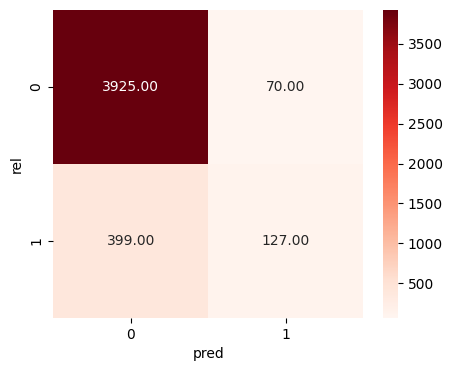

In [59]:
print(f"najlepsze parmatey: {grid_search.best_params_}")
print(f"score najlpeszy: {grid_search.best_score_:.4f}")

y_pred = best_lr.predict(x_val)
print(classification_report(y_val, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='.2f', cmap='Reds')
plt.xlabel('pred')
plt.ylabel('rel')
plt.show()

## TREE

najlepsze parametry: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
score najlpeszy: 0.8979
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      3995
         1.0       0.63      0.36      0.45       526

    accuracy                           0.90      4521
   macro avg       0.77      0.66      0.70      4521
weighted avg       0.89      0.90      0.89      4521



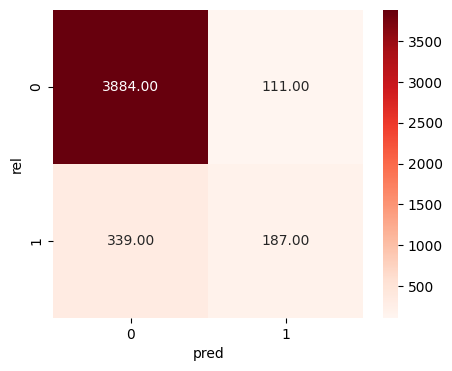

In [60]:
rf_model = RandomForestClassifier(random_state=11)
param_grid = {
    'n_estimators': [50, 100, 200], # ilosc 
    'max_depth': [None, 10, 20], # glebokośc
    'min_samples_split': [2, 5] #wezel od 
}
grid_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(x_train, y_train.values.ravel()) 

best_rf = grid_rf.best_estimator_
print(f"najlepsze parametry: {grid_rf.best_params_}")
print(f"score najlpeszy: {grid_rf.best_score_:.4f}")

y_pred_rf = best_rf.predict(x_val)

acc_rf = accuracy_score(y_val, y_pred_rf)
print(classification_report(y_val, y_pred_rf))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_val, y_pred_rf), annot=True, fmt='.2f', cmap='Reds')
plt.xlabel('pred')
plt.ylabel('rel')
plt.show()

# MLP

/home/fidok/Projects/Solvro/Wdrozenie/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


najlepsze parametry: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50,)}
score najlpeszy: 0.8989
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      3995
         1.0       0.63      0.38      0.48       526

    accuracy                           0.90      4521
   macro avg       0.78      0.68      0.71      4521
weighted avg       0.89      0.90      0.89      4521



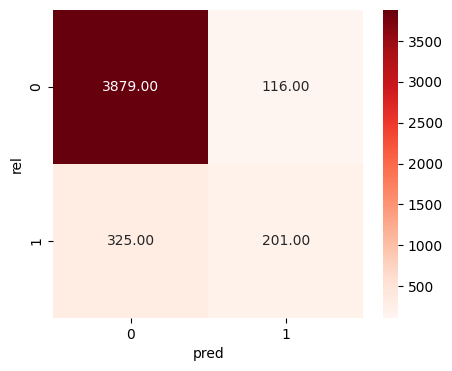

In [ ]:
mlp_model = MLPClassifier(max_iter=1000, random_state=11)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)], #warstwy ukreyte
    'activation': ['tanh', 'relu'], #fun aktwywacji neuronu
    'alpha': [0.0001, 0.05] #skok uczacy
}

grid_mlp = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_mlp.fit(x_train, y_train.values.ravel())

best_mlp = grid_mlp.best_estimator_
print(f"najlepsze parametry: {grid_mlp.best_params_}")
print(f"score najlpeszy: {grid_mlp.best_score_:.4f}")

y_pred_mlp = best_mlp.predict(x_val)

acc_mlp = accuracy_score(y_val, y_pred_mlp)
print(classification_report(y_val, y_pred_mlp))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_val, y_pred_mlp), annot=True, fmt='.2f', cmap='Reds')
plt.xlabel('pred')
plt.ylabel('rel')
plt.show()

Njalepiej wypadlo treee, przetestujmy je na zbiorze test

acc: 0.8983
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      3988
         1.0       0.62      0.36      0.45       534

    accuracy                           0.90      4522
   macro avg       0.77      0.66      0.70      4522
weighted avg       0.88      0.90      0.89      4522



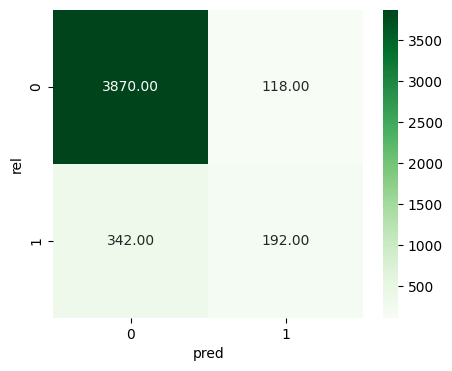

In [64]:
y_pred_rf = best_rf.predict(x_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"acc: {acc_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='.2f', cmap='Greens')
plt.xlabel('pred')
plt.ylabel('rel')
plt.show()

# SHAP

Wszystkie modele są do siebie podobne, SHAP zrobimy na MLP

Oryginalny typ danych: <class 'numpy.ndarray'>
Format: MACIERZ 3D (4522, 29, 2). Wycinam [:, :, 1].
Kształt danych do wykresu: (4522, 29)


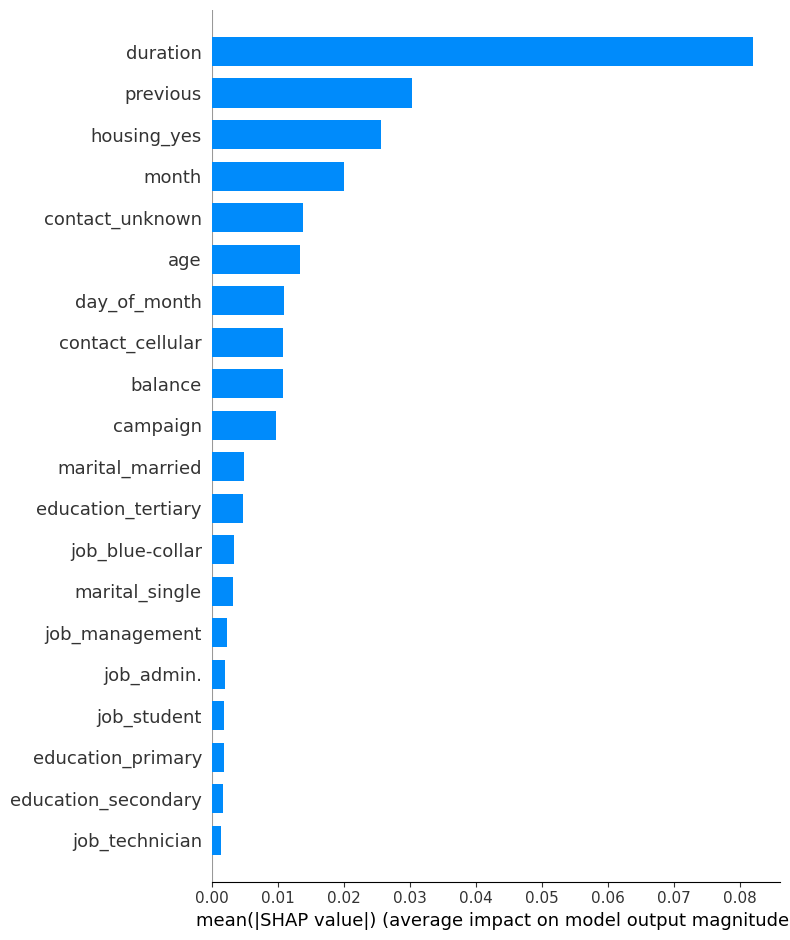

In [67]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# 1. Obliczamy SHAP
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(x_test)

# 2. DIAGNOSTYKA I NAPRAWA (To naprawi Twój błąd)
print(f"Oryginalny typ danych: {type(shap_values)}")

if isinstance(shap_values, list):
    # Przypadek A: Lista dwóch macierzy (np. starsze wersje sklearn)
    print("Format: LISTA. Wybieram indeks [1] (Klasa Pozytywna).")
    shap_values_for_plot = shap_values[1]

elif hasattr(shap_values, 'shape') and len(shap_values.shape) == 3:
    # Przypadek B: Macierz 3D (Twój przypadek!)
    print(f"Format: MACIERZ 3D {shap_values.shape}. Wycinam [:, :, 1].")
    shap_values_for_plot = shap_values[:, :, 1]

else:
    # Przypadek C: Macierz 2D (Jest OK)
    print("Format: MACIERZ 2D. Zostawiam bez zmian.")
    shap_values_for_plot = shap_values

# 3. Rysujemy wykres
print(f"Kształt danych do wykresu: {shap_values_for_plot.shape}")
# Powinno być (45211, 29)

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values_for_plot, x_test, plot_type="bar")
plt.show()

25 min * 6, bo się wywalało rozmiarowo pozdrawiwam

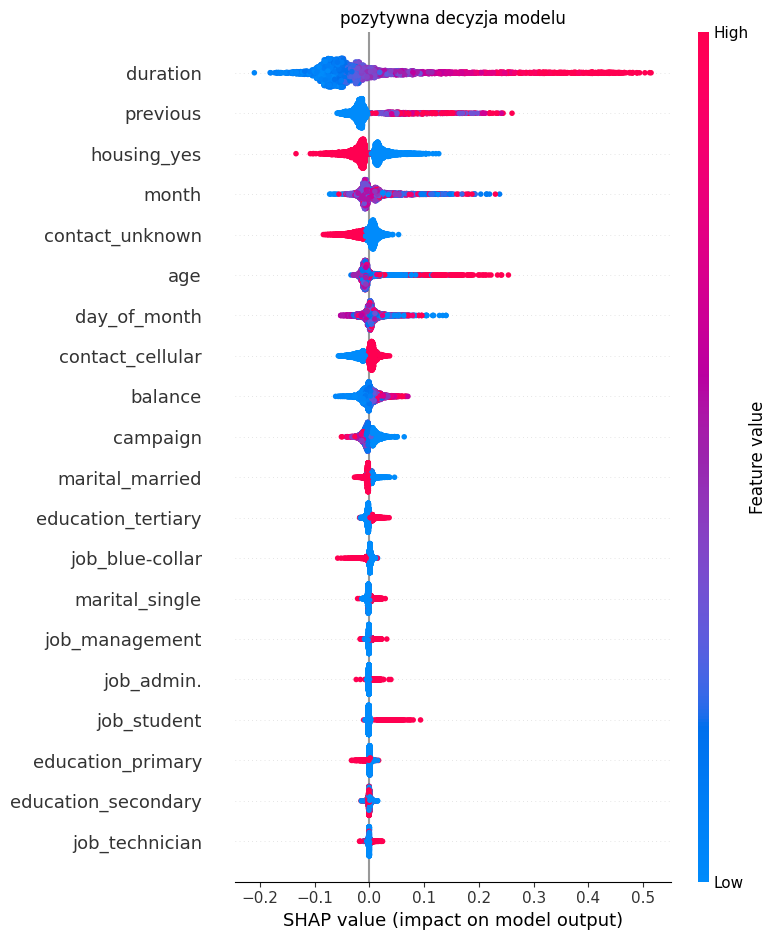

In [70]:
if isinstance(shap_values, list):
    shap_vals_target = shap_values[1]
elif hasattr(shap_values, 'shape') and len(shap_values.shape) == 3:
    shap_vals_target = shap_values[:, :, 1]
else:
    shap_vals_target = shap_values

plt.figure(figsize=(10, 8))
plt.title("pozytywna decyzja modelu")
shap.summary_plot(shap_vals_target, x_test)
plt.show()

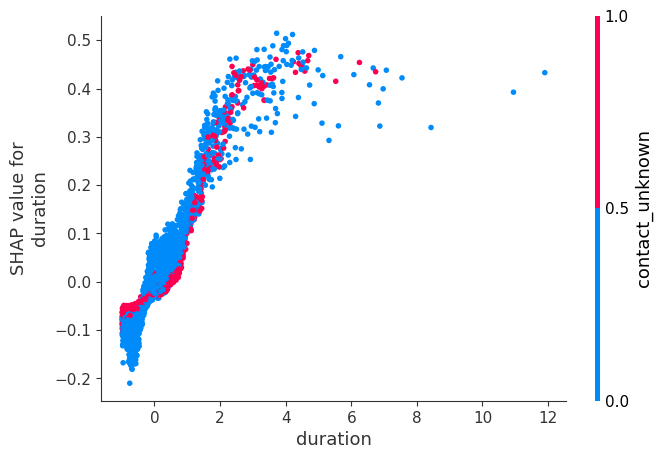

In [72]:
if isinstance(shap_values, list):
    shap_vals_target = shap_values[1]
elif hasattr(shap_values, 'shape') and len(shap_values.shape) == 3:
    shap_vals_target = shap_values[:, :, 1]
else:
    shap_vals_target = shap_values

shap.dependence_plot(
    "duration",
    shap_vals_target,
    x_test,
    interaction_index="auto"
)

In [75]:
x_train['duration'].max()

np.float64(18.100964887289813)

No i wychodzą wartości skrajne, na które zapomniało się spojrzeć 

# Wnioski

z wniosków to że maglowanie klienta przez telefon się opłaca. nie jest to niestety zmienna z której można byłoby liniową zależność wyciągnąć, jak na przykład housing czy contact_unknown. wszystkie testowane modele (Regresja Logistyczna, Random Forest, MLP) osiągnęły zbliżoną dokładność, czyli o sukcesie predykcji decyduje w tym przypadku jakość danych, a nie złożoność algorytmu. Analiza ujawniła obecność silnych wartości odstających, szczególnie w zmiennej duration (sięgających 18 odchyleń standardowych), a metoda SHAP jednoznacznie potwierdziła, że to właśnie długość rozmowy jest kluczowym czynnikiem zwiększającym szansę na sprzedaż. Napotkane wyzwania techniczne z formatowaniem danych podkreśliły, że preprocessing jest najbardziej krytycznym etapem pracy. Ostatecznie, ze względu na balans między wynikami a łatwością interpretacji, rekomenduje się wdrożenie modelu Random Forest oraz biznesowe skupienie na wydłużaniu czasu dialogu z klientem.